In [33]:
# Q2
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.linear_model import LinearRegression 
from sklearn.preprocessing import LabelBinarizer

df = pd.read_csv('data/heart_hw.csv')

print("df.shape:")
print(df.shape, '\n')

print("df.dtypes:")
print(df.dtypes, '\n')

print("df.columns:")
print(df.columns, '\n')

df.isna().any()
df.head()

df.shape:
(103, 4) 

df.dtypes:
Unnamed: 0     int64
age            int64
transplant    object
y              int64
dtype: object 

df.columns:
Index(['Unnamed: 0', 'age', 'transplant', 'y'], dtype='object') 



,Unnamed: 0,age,transplant,y
0,1,53,control,0
1,2,43,control,0
2,3,52,control,0
3,4,52,control,0
4,5,54,control,0


In [ ]:
# Q2, Part 1 

df = pd.read_csv('data/heart_hw.csv')

# Map string labels to binary
df['transplant'] = df['transplant'].astype(str).str.strip().str.lower().map({
    'control': 0,
    'treatment': 1
})

# Ensure 'y' is numeric
df['y'] = pd.to_numeric(df['y'], errors='coerce')

# Drop missing values
df = df.dropna(subset=['transplant', 'y'])

# Compute proportions
p_control = df.loc[df['transplant'] == 0, 'y'].mean()
p_treatment = df.loc[df['transplant'] == 1, 'y'].mean()
ate = p_treatment - p_control

# Print results (NO f-strings)
print("Control group survival rate:", p_control)
print("Treatment group survival rate:", p_treatment)
print("Average Treatment Effect (ATE):", ate)


Control group survival rate: 0.11764705882352941
Treatment group survival rate: 0.34782608695652173
Average Treatment Effect (ATE): 0.23017902813299232


In [42]:
import numpy as np
import pandas as pd

# Design matrix: add constant manually
X = pd.DataFrame({
    'const': 1,
    'transplant': df['transplant']
})

# Outcome
y = df['y']

# Convert to NumPy arrays
X_np = X.to_numpy()
y_np = y.to_numpy()

# Compute OLS coefficients using normal equations: β = (X'X)^-1 X'y
XtX = X_np.T @ X_np
Xty = X_np.T @ y_np
beta = np.linalg.inv(XtX) @ Xty  # [intercept, transplant coefficient]

# Extract and print results
intercept = beta[0]
coef_transplant = beta[1]

print("Intercept (const):", intercept)
print("Coefficient on transplant:", coef_transplant)


Intercept (const): 0.1176470588235295
Coefficient on transplant: 0.23017902813299235


In [2]:
import numpy as np
import pandas as pd

# Step 0: Load CSV
df = pd.read_csv('data/heart_hw.csv')

# Step 1: Clean transplant column
df['transplant'] = df['transplant'].astype(str).str.strip().str.lower().map({
    'control': 0,
    'treatment': 1
})

# Step 2: Make sure y and age are numeric
df['y'] = pd.to_numeric(df['y'], errors='coerce')
df['age'] = pd.to_numeric(df['age'], errors='coerce')

# Step 3: Drop rows with missing values in any of the required columns
df_clean = df.dropna(subset=['y', 'transplant', 'age']).copy()

# Step 4: Create the design matrix X
X = pd.DataFrame({
    'const': 1,  # Intercept
    'transplant': df_clean['transplant'],
    'age': df_clean['age']
})

# Step 5: Target variable
y = df_clean['y']

# Step 6: Convert to NumPy arrays
X_np = X.to_numpy()
y_np = y.to_numpy()

# Step 7: Run linear regression using the normal equations
XtX = X_np.T @ X_np
Xty = X_np.T @ y_np
beta = np.linalg.inv(XtX) @ Xty  # β = (X'X)^(-1) X'y

# Step 8: Print coefficients
print("Intercept (const):", beta[0])
print("Coefficient on transplant:", beta[1])
print("Coefficient on age:", beta[2])


Intercept (const): 0.7019569721740943
Coefficient on transplant: 0.26470168650367515
Coefficient on age: -0.013607217160218645


R-squared on test data: 0.23291360740207956


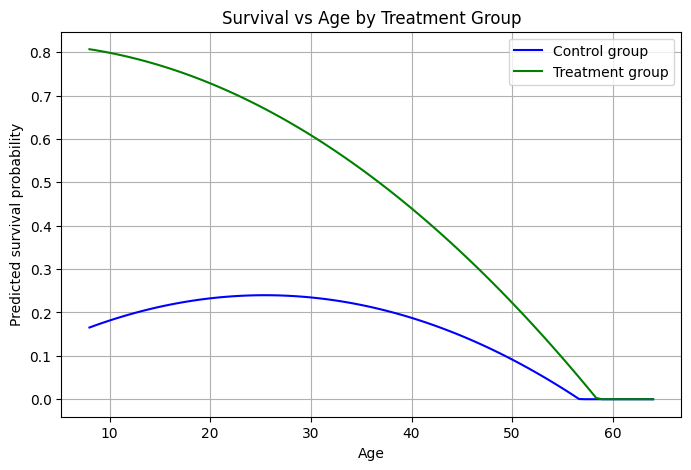

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

# Load and clean
df = pd.read_csv('data/heart_hw.csv')

# Standardize 'transplant' column
df['transplant'] = df['transplant'].astype(str).str.strip().str.lower().map({
    'control': 0,
    'treatment': 1
})

# Convert to numeric
df['y'] = pd.to_numeric(df['y'], errors='coerce')
df['age'] = pd.to_numeric(df['age'], errors='coerce')

# Drop rows with missing values
df = df.dropna(subset=['y', 'transplant', 'age'])

# Create new features: age^2 and transplant × age (interaction)
df['age_squared'] = df['age'] ** 2
df['transplant_x_age'] = df['transplant'] * df['age']

# Select features and outcome
features = ['transplant', 'age', 'age_squared', 'transplant_x_age']
X = df[features]
y = df['y']

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Evaluate performance on test data
r2 = model.score(X_test, y_test)
print("R-squared on test data:", r2)

# Create a range of ages
ages = np.linspace(df['age'].min(), df['age'].max(), 100)

# Create two sets of inputs: one with transplant = 0, one with transplant = 1
X_plot_ctrl = pd.DataFrame({
    'transplant': 0,
    'age': ages,
    'age_squared': ages ** 2,
    'transplant_x_age': 0
})

X_plot_treat = pd.DataFrame({
    'transplant': 1,
    'age': ages,
    'age_squared': ages ** 2,
    'transplant_x_age': ages
})

# Predict survival probability
y_pred_ctrl = model.predict(X_plot_ctrl)
y_pred_treat = model.predict(X_plot_treat)

# Clip values between 0 and 1 (since survival can't go below 0 or above 1)
y_pred_ctrl = np.clip(y_pred_ctrl, 0, 1)
y_pred_treat = np.clip(y_pred_treat, 0, 1)

plt.figure(figsize=(8, 5))
plt.plot(ages, y_pred_ctrl, label='Control group', color='blue')
plt.plot(ages, y_pred_treat, label='Treatment group', color='green')
plt.xlabel('Age')
plt.ylabel('Predicted survival probability')
plt.title('Survival vs Age by Treatment Group')
plt.legend()
plt.grid(True)
plt.show()

